<a href="https://colab.research.google.com/github/AnanyaSharma2/MachineLearning/blob/main/SVM/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Problem Statement

**Objective:** Construct a machine learning model to predict insurance charges based on customer health indicators and demographics.

**Data:** We have a dataset containing customer information including:

* Age
* Gender (categorical)
* Body Mass Index (BMI)
* Number of Dependents (children)
* Smoking Status (categorical)
* Religion (categorical) **(to be treated with caution)**

**Exploration and Analysis:**

* Analyze correlations between features and insurance charges.
* Identify potential biases, particularly regarding religion. Religion may not be a statistically significant predictor and could raise ethical concerns. We may need to exclude it or find a suitable replacement.
* Feature engineer new variables if necessary (e.g., age groups).
* Handle categorical variables appropriately (e.g., one-hot encoding).

**Modeling:**

* Develop and evaluate different machine learning models (e.g., linear regression, random forest) to predict insurance charges.
* Compare model performance metrics (e.g., R-squared, mean squared error) and select the best performing model.

This project will provide valuable insights for developing a fair and data-driven insurance pricing strategy.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading DataSet**

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
53,36,male,34.430,0,yes,southeast,37742.57570
1156,19,male,44.880,0,yes,southeast,39722.74620
862,55,female,33.535,2,no,northwest,12269.68865
260,58,female,25.200,0,no,southwest,11837.16000
993,38,male,28.270,1,no,southeast,5484.46730


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Data Processing**

In [ ]:
df.duplicated().sum()

1

As there is a presence of a singular data duplication, we can safely disregard it from our analysis."

**Converting the sex ad smoker column to integer using pd.get_dummies**

In [ ]:
Male = pd.get_dummies(df['sex'],drop_first=True)

In [ ]:
Male.head(2)

,male
0,0
1,1


In [ ]:
Smoker = pd.get_dummies(df['smoker'],drop_first=True)

In [ ]:
Smoker.head(4)

,yes
0,1
1,0
2,0
3,0


In [ ]:
df = pd.concat([df,Male,Smoker],axis=1)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
df.rename(columns={'yes':'Smoker'})

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


## **Exploratory Data Analysis**

<ipython-input-67-e12c642adc43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'sex',data= df,palette='pastel')


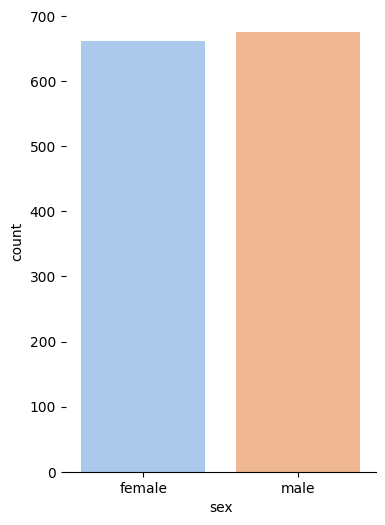

In [ ]:
plt.figure(figsize=(4,6))
sns.countplot(x= 'sex',data= df,palette='pastel')
sns.despine(left =True)

## **Finding correlation between the features**

In [ ]:
corr=df.corr()

<ipython-input-68-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [ ]:
corr

,age,bmi,children,charges,male,yes
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


<Axes: >

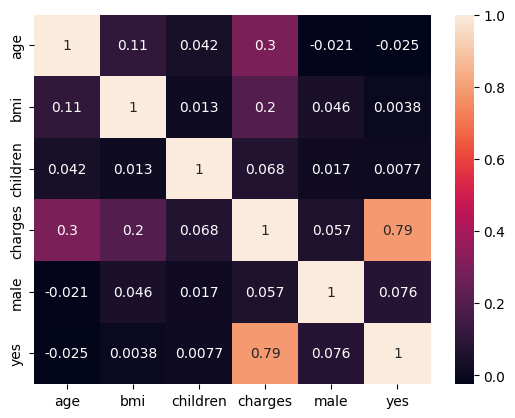

In [ ]:
sns.heatmap(corr,annot=True)

# **Distribution of Charges by Sex and Smoking Status**

<Axes: xlabel='sex', ylabel='charges'>

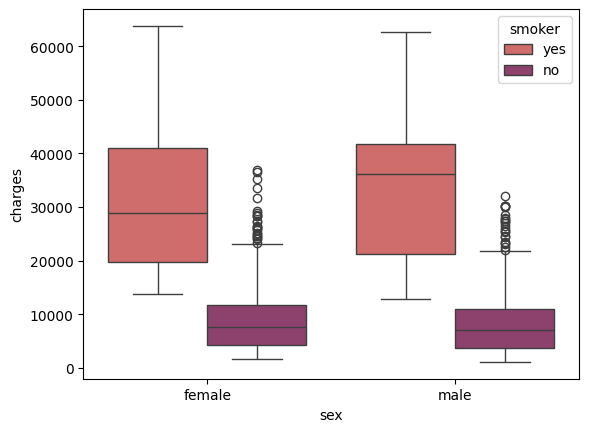

In [ ]:
sns.boxplot(y='charges',x='sex',hue='smoker',palette='flare',data =df)

**This graph suggests a correlation between smoking and higher insurance premiums for both men and women.Smokers, both male and female, generally pay more for insurance than non-smokers.**

# **Analyzing Impact of Smoking on Age and Insurance Charges**

<Axes: xlabel='age', ylabel='charges'>

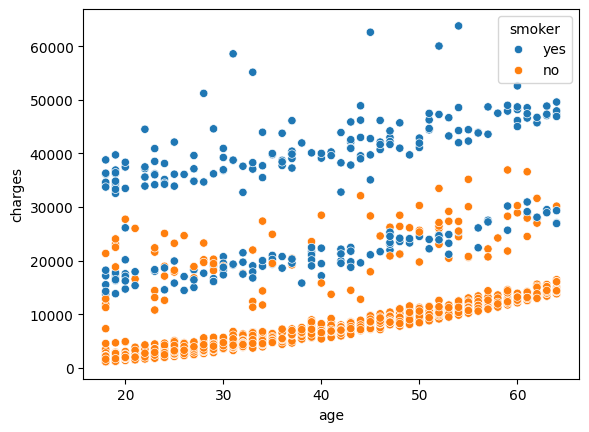

In [ ]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])

**This graph shows a strong link between smoking and higher insurance premiums across all age groups. At every age, smokers pay more than non-smokers. The cost of insurance increases with age for both smokers and non-smokers, but the increase is steeper for smokers. This means the difference in cost between smokers and non-smokers gets wider as people get older.**

<Axes: xlabel='bmi', ylabel='charges'>

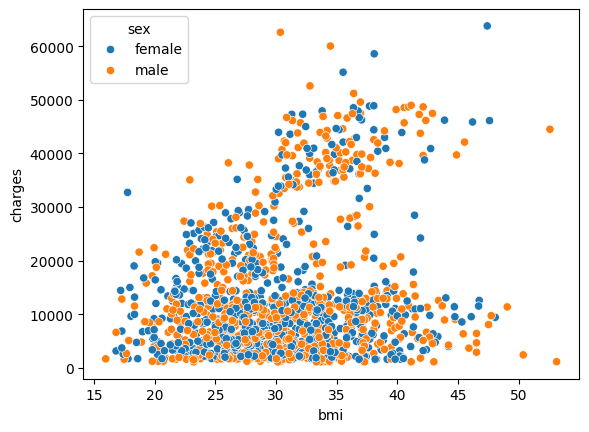

In [ ]:
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['sex'])

<Axes: xlabel='bmi', ylabel='charges'>

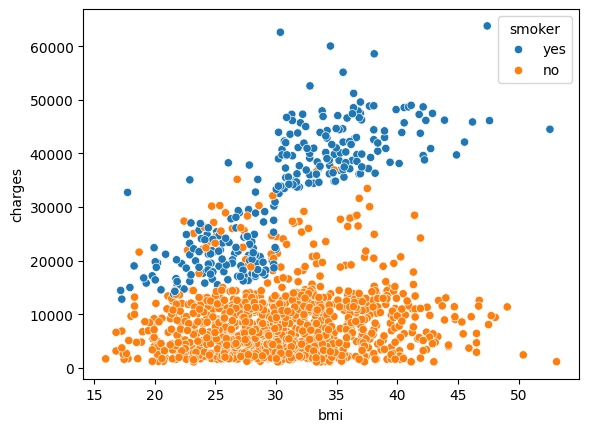

In [ ]:
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['smoker'])

**This graph reveals a significant correlation between smoking and higher insurance premiums regardless of Body Mass Index (BMI). Across all BMI categories, smokers consistently pay more than non-smokers. While insurance costs rise with increasing BMI for both groups, the increase is steeper for smokers. This translates to a widening gap in premiums between smokers and non-smokers as BMI increases.**

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

# **Splitting Data into Train And Test Dataset**

In [ ]:
x= df.drop('charges',axis=1)
y= df['charges']

In [ ]:
x

,age,bmi,children,male,yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(936, 5)
(402, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train

,age,bmi,children,male,yes
618,19,33.110,0,0,1
632,29,35.530,0,0,0
551,32,28.930,0,0,0
64,20,22.420,0,0,1
245,54,30.020,0,1,0
...,...,...,...,...,...
217,27,23.100,0,1,0
162,54,39.600,1,1,0
215,41,37.100,2,0,0
849,55,32.775,0,1,0


In [ ]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## **Building a model**

In [122]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', gamma=0.1)
model.fit(scaled_x_train,y_train)

SVR(gamma=0.1)

# **Model Prediction**

In [123]:
predict = model.predict(scaled_x_test)

In [124]:
predict

array([9068.07557067, 9230.30172978, 9202.00236105, 9108.40495305,
       9178.86123431, 9114.34945738, 9137.34176219, 9146.67396632,
       9243.50909576, 9221.11814158, 9145.18851002, 9129.60287192,
       9080.29902121, 9050.49034103, 9135.22252557, 9126.57719016,
       9093.62721438, 9165.44624962, 9055.67135196, 9216.58152497,
       9055.84585631, 9186.06871314, 9118.32568966, 9076.38642331,
       9064.56089578, 9175.18010577, 9202.37673062, 9187.34350514,
       9194.51886083, 9214.01670286, 9194.25995279, 9048.28257171,
       9103.14383114, 9124.77513798, 9170.75129747, 9179.21238902,
       9089.32534784, 9057.11398441, 9169.3946316 , 9164.46154102,
       9056.85959551, 9113.63214008, 9087.38662525, 9052.90314423,
       9062.67056654, 9184.08529544, 9157.37267565, 9185.34403549,
       9154.89266631, 9222.52472805, 9042.29010392, 9064.25962003,
       9119.811504  , 9173.93745162, 9127.89389102, 9060.96317166,
       9194.25688501, 9142.74417742, 9052.89182617, 9223.99498